# Project: Wrangling and Analyze Data

#### Modules import

In [53]:
import pandas as pd
import numpy as np
import requests as req
import tweepy
import json
import re

## Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
archive_twitter = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

- Download the file and write it in a file

In [4]:
URL = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

images_datas = req.get(URL)
with open('predicted_images.tsv', 'wb') as file:
    file.write(images_datas.content)

- Load the file in a dataframe for easy use

In [5]:
images_prediction_df = pd.read_csv('predicted_images.tsv', sep="\t")

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

- Config file loading
As it has been asked in the directives, my secrets keys do not appear in the project, so, i have create a config json file to store all the secrets keys of my account

In [6]:
with open ('tweepy_config.json') as file:
    config = json.load(file)

- Authentification

In [7]:
auth = tweepy.OAuthHandler(config['api_key'], config['api_secret'])
auth.set_access_token(config['access_token'], config['secret_access_token'])
api = tweepy.API(auth, wait_on_rate_limit=True)

- Data collect in a json file

In [9]:
tweets_id = archive_twitter[('tweet_id')].tolist()

with open('tweet_json.txt', 'w') as file:
    for tweet_id in tweets_id :
        try :
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, file)
            file.write('\n')
        except tweepy.error.TweepError as error:
            print("Error for tweet with id :%s --- %s" % (tweet_id, error))

Error for tweet with id :888202515573088257 --- [{'code': 144, 'message': 'No status found with that ID.'}]
Error for tweet with id :873697596434513921 --- [{'code': 144, 'message': 'No status found with that ID.'}]
Error for tweet with id :872668790621863937 --- [{'code': 144, 'message': 'No status found with that ID.'}]
Error for tweet with id :872261713294495745 --- [{'code': 144, 'message': 'No status found with that ID.'}]
Error for tweet with id :869988702071779329 --- [{'code': 144, 'message': 'No status found with that ID.'}]
Error for tweet with id :866816280283807744 --- [{'code': 144, 'message': 'No status found with that ID.'}]
Error for tweet with id :861769973181624320 --- [{'code': 144, 'message': 'No status found with that ID.'}]
Error for tweet with id :856602993587888130 --- [{'code': 144, 'message': 'No status found with that ID.'}]
Error for tweet with id :856330835276025856 --- [{'code': 144, 'message': 'No status found with that ID.'}]
Error for tweet with id :851

- Create a dataframe for containing the useful information we want to collect : number of retweets and likes 

In [10]:
like_retweet_datas = []
with open('tweet_json.txt') as file:
    all_lines = file.readlines()

for line in all_lines:
    single_tweet = json.loads(line)
    like_retweet_datas.append((single_tweet["id"], single_tweet["favorite_count"], single_tweet["retweet_count"]))
    
like_retweet_df = pd.DataFrame(data= np.array(like_retweet_datas), columns = ["tweet_id", "likes_count", "retweets_count"])

## Assessing Data

### Visual Evaluation

I have opened firstly `archive_twitter dataframe` in google sheet application

By visualizing some rows i have reported somme quality problems like
- Some tweets does not concern dogs(In the text column it can be read content like : "we only rate dogs", "Please only send in dogs", etc)
- Some rows has name column value like a, an,the, this, actually, getting, old, all,just,the whereas in the text column , the content either contains the right name or doesn't contains any name)
- Invalid name for Eazy-E instead of Eazy according to the content of the text where according to it, the name should be Eazy-E
- Many missing values for puppo, pupper, floofer and doggo columns

For the two others dataframes , nothing has particularly been observed

### Programmatical Evaluation

**`archive_twitter`** table

In [11]:
archive_twitter.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
706,785533386513321988,NaN,NaN,2016-10-10 17:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dallas. Her tongue is ridiculous. 11/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785533386...,11,10,Dallas,None,None,None,None
1631,684481074559381504,NaN,NaN,2016-01-05 21:06:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Pippa. She's an Elfin High Feta. Compact ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684481074...,10,10,Pippa,None,None,None,None
397,825120256414846976,NaN,NaN,2017-01-27 23:16:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to Pablo. He's one go...,8.250266e+17,4.196984e+09,2017-01-27 17:04:02 +0000,https://www.gofundme.com/my-puppys-double-cata...,12,10,Pablo,None,None,None,puppo
1901,674646392044941312,NaN,NaN,2015-12-09 17:46:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Two gorgeous dogs here. Little waddling dog is...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674646392...,5,10,None,None,None,None,None
253,844704788403113984,NaN,NaN,2017-03-23 00:18:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Luna. It's her first time outside and ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/844704788...,13,10,Luna,None,None,None,None
1698,681193455364796417,NaN,NaN,2015-12-27 19:22:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Aspen. He's astronomically fluffy. I w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681193455...,11,10,Aspen,None,None,None,None
825,769695466921623552,NaN,NaN,2016-08-28 00:37:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Titan. He's trying to make friends. Of...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/769695466...,13,10,Titan,None,None,None,None
598,798686750113755136,NaN,NaN,2016-11-16 00:38:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Say hello to Jack (pronounced ""...",6.833919e+17,4.196984e+09,2016-01-02 20:58:09 +0000,https://twitter.com/dog_rates/status/683391852...,11,10,Jack,None,None,None,None
1872,675146535592706048,NaN,NaN,2015-12-11 02:54:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Coops. He's yelling at the carpet. Not...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675146535...,7,10,Coops,None,None,None,None
736,780931614150983680,NaN,NaN,2016-09-28 00:46:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I want to finally rate this iconic puppo who t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/780931614...,13,10,None,None,None,None,puppo


- Columns `doggo`, `floofer`, `pupper`, `puppo` represents rather a column value. It can be named dog_stage. This is tidiness issue
- The retweets are tweets where retweeted_status_id is not null : It represents a quality problem and it has already been asked to just take into account only tweets
- Some columns will be useless for analysis : their values represents low data quality (for example : in_reply_to_status_id, in_reply_to_user_id, source, retweeted_status_id , retweeted_status_user_id, retweeted_status_timestamp after deleting all retweet....)

In [12]:
archive_twitter.shape

(2356, 17)

- Some values are missing : It is certainly dued to the fact that a first clean has already been made : It won't be take into account here then

In [13]:
archive_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

- Timestamp column has wrong datatypes

In [14]:
archive_twitter[archive_twitter.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


- No record duplicated

In [15]:
archive_twitter["name"].value_counts()

None            745
a                55
Charlie          12
Lucy             11
Cooper           11
Oliver           11
Tucker           10
Lola             10
Penny            10
Winston           9
Bo                9
Sadie             8
the               8
an                7
Bailey            7
Daisy             7
Toby              7
Buddy             7
Bella             6
Jax               6
Stanley           6
Jack              6
Milo              6
Oscar             6
Rusty             6
Leo               6
Koda              6
Scout             6
Dave              6
very              5
               ... 
Jangle            1
Glenn             1
Alexanderson      1
Carper            1
Cermet            1
Cupid             1
Snicku            1
Patch             1
Aiden             1
Anna              1
Halo              1
Lolo              1
Hector            1
Rey               1
Link              1
Tupawc            1
Kingsley          1
Claude            1
Shikha            1


- It confirms our visualisation : Some name values are incorrect

In [16]:
archive_twitter["rating_numerator"].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

- Some values are extreme

In [17]:
archive_twitter["rating_denominator"].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

- Some rating_denominator values are incoherent regarding the value of the most 

**`like_retweet_df`** table

In [20]:
like_retweet_df.sample(10)

,tweet_id,likes_count,retweets_count
1496,690597161306841088,1780,546
1123,725842289046749185,6515,2410
1598,684800227459624960,2512,899
1681,680609293079592961,2408,622
1037,740711788199743490,3140,858
2325,666029285002620928,112,39
2028,671355857343524864,418,104
948,750026558547456000,2519,717
49,882627270321602560,24529,5042
1641,682429480204398592,3175,1042


In [21]:
like_retweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null int64
likes_count       2327 non-null int64
retweets_count    2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [23]:
like_retweet_df.shape

(2327, 3)

In [24]:
like_retweet_df[like_retweet_df.duplicated()]

,tweet_id,likes_count,retweets_count


- No null and duplicated values

In [25]:
like_retweet_df.describe()

,tweet_id,likes_count,retweets_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,7027.074345,2458.798883
std,6.820795e+16,10920.415326,4163.981032
min,6.660209e+17,0.000000,1.000000
25%,6.781394e+17,1220.500000,492.500000
50%,7.178418e+17,3038.000000,1144.000000
75%,7.986547e+17,8565.500000,2845.000000
max,8.924206e+17,144253.000000,70335.000000


**`images_prediction_df`** table

In [26]:
images_prediction_df.shape

(2075, 12)

In [27]:
images_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [28]:
images_prediction_df.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
218,670073503555706880,https://pbs.twimg.com/media/CUyUSuWXIAAZKYF.jpg,1,malamute,0.601886,True,Siberian_husky,0.340106,True,Eskimo_dog,0.050041,True
1556,793210959003287553,https://pbs.twimg.com/media/CwINKJeW8AYHVkn.jpg,1,doormat,0.874431,False,French_bulldog,0.018759,True,Boston_bull,0.015134,True
653,682047327939461121,https://pbs.twimg.com/media/CXcebTeWsAUQJ-J.jpg,1,teddy,0.364095,False,doormat,0.119243,False,toyshop,0.035127,False
1001,708738143638450176,https://pbs.twimg.com/media/CdXxlFPWwAABaOv.jpg,1,Pomeranian,0.933457,True,Samoyed,0.057221,True,West_Highland_white_terrier,0.000904,True
898,699779630832685056,https://pbs.twimg.com/media/CbYd3C9WEAErJ4Z.jpg,1,malinois,0.706038,True,German_shepherd,0.165655,True,Great_Dane,0.059048,True
1961,866450705531457537,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,2,French_bulldog,0.905334,True,Boston_bull,0.078060,True,pug,0.001771,True
449,674737130913071104,https://pbs.twimg.com/media/CV0l10AU8AAfg-a.jpg,1,Pomeranian,0.948537,True,schipperke,0.014310,True,Chihuahua,0.008120,True
1272,750011400160841729,https://pbs.twimg.com/media/CmfmvGUWgAAuVKD.jpg,1,muzzle,0.237620,False,Boston_bull,0.087150,True,sombrero,0.068510,False
318,671763349865160704,https://pbs.twimg.com/media/CVKVM3NW4AAdi1e.jpg,1,prayer_rug,0.445334,False,doormat,0.275311,False,bib,0.048813,False
1557,793226087023144960,https://pbs.twimg.com/media/CwIa5CjW8AErZgL.jpg,1,wire-haired_fox_terrier,0.456047,True,Lakeland_terrier,0.273428,True,English_springer,0.083643,True


- Some columns like img_num and jpg_url won(t be useful for this analysis
- Every row should be an observation : Just one prediction with the most prediction percentage should be then considered and the others removed

In [31]:
images_prediction_df[images_prediction_df['tweet_id'].duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


- No duplicated records

- Also, all dataframes should be merged to form one table

## Summary of issues

### Quality issues
##### `archive_twitter` dataframe

0.  Missing records (2356 instead of +5k : won't take into account here)
1.  Some retweets in the dataset
2.  Some tweets does not concern dogs(when text contains we only rate dogs, Please only send in dogs, etc)
3.  Useless columns for analysis : low data quality (in_reply_to_status_id, in_reply_to_user_id, source, retweeted_status_id , retweeted_status_user_id, retweeted_status_timestamp after deleting all retweet....)
4.  Erroneous datatypes(timestamp should be datetime)
5.  Invalid name for some rows( name like a, an,the, this, actually, getting, old, all,just,the, very)
6.  Invalid name for Eazy-E :  Eazy-E instead of Eazy
7.  Incoherent values for rating denominator 
8.  Missing values for dog_stage(pupper, dogger, floofer, puppo : some can be getted from the text column)

##### `images_predicted` dataframe

9.  Useless columns for analysis: low data quality (jpg_url,img_num)

### Tidiness issues
##### `archive_twitter` dataframe

1.  1 variable in four columns (pupper, dogger, flusher, puppo must be the values of one column : dog_stage)
2.  Every row should be an observation : one prediction with the most prediction percentage should be considered and the others removed

3. Dataframes should be merged on `tweet_id` for having all datas in a dataframe

## Cleaning Data

In [32]:
# Make copies of original pieces of data

archive_twitter_copy = archive_twitter.copy()
images_prediction_copy = images_prediction_df.copy()
like_retweet_copy = like_retweet_df.copy()

### Issue #1:

`archive_twitter` : Some retweets in the dataset

#### Define:

The retweets are the tweets which have their retweeted_status_id and retweeted_status_user_id are not null

Delete records where retweet_status_id is not null. In other terms, keep the records where retweeted_status_id is null

#### Code

In [33]:
archive_twitter_copy = archive_twitter_copy[archive_twitter_copy['retweeted_status_id'].isnull()]

#### Test

In [34]:
archive_twitter_copy.shape

(2175, 17)

In [35]:
archive_twitter_copy[archive_twitter_copy['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #2:

`archive_twitter` : Useless columns for analysis : low data quality (in_reply_to_status_id, in_reply_to_user_id, source, retweeted_status_id , retweeted_status_user_id, retweeted_status_timestamp after deleting all retweet....)

#### Define

Drop all columns that are useless for the analysis : the ones which are low in data quality(almost same value for source , nan value for retweeted_status_id, etc) 

#### Code

In [36]:
columns_to_delete = ["in_reply_to_status_id", "in_reply_to_user_id", "source", "retweeted_status_id" , "retweeted_status_user_id", "retweeted_status_timestamp"]
archive_twitter_copy.drop(columns=columns_to_delete, axis=1, inplace=True)

#### Test

In [37]:
archive_twitter_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


In [38]:
archive_twitter_copy.sample()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1842,675870721063669760,2015-12-13 02:51:51 +0000,&amp; this is Yoshi. Another world record cont...,https://twitter.com/dog_rates/status/675870721...,11,10,None,None,None,None,None


### Issue #3:

`archive_twitter` : Erroneous datatypes(timestamp should be datetime)

#### Define

Change the datatype of timestamps column to datetime

#### Code

In [39]:
archive_twitter_copy['timestamp'] = pd.to_datetime(archive_twitter_copy['timestamp'])

#### Test

In [40]:
archive_twitter_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 203.9+ KB


### Issue #4:

`archive_twitter` : Some tweets does not concern dogs(when text contains we only rate dogs, Please only send in dogs, etc)


#### Define
 
Drop all records where text column value contains at least one of the expressions "We only rate dogs", "warning", "Please only send in dogs"

#### Code

In [41]:
# A function which return a df without the records where text columns contains the specified wrong_value

def delete_no_dogs_tweet(wrong_value):
    df = archive_twitter_copy[~archive_twitter_copy["text"].str.contains(wrong_value)]
    return df

In [42]:
wrong_values = ["We only rate dogs", "warning", "Please only send in dogs"]

for value in wrong_values:
    archive_twitter_copy = delete_no_dogs_tweet(value)

#### Test

In [43]:
archive_twitter_copy.shape

(2121, 11)

In [45]:
archive_twitter_copy[archive_twitter_copy["text"].isin(wrong_values)]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #5:

`archive_twitter` : Invalid name for some rows( name like a, an,the, this, actually, getting, old, all,just,the sometimes)

#### Define

- Write a function which will extract the name following a regex for name where value is `a`, `an` 

The regex are : 'named\s(\w+)' and 'His\sname\sis\s(\w+)'
- For the rest of wrong values, an visual asessing has shown that either the tweet does not concerned a dog or there is no name specified. Replace them by none

#### Code

In [51]:
def extract_name(value, index):
    if value['name'] in ['a', 'an']:
        val = re.findall(r'named\s(\w+)', archive_twitter_copy.loc[index,'text'])
        if not val:
            val = re.findall(r'His\sname\sis\s(\w+)', archive_twitter_copy.loc[index,'text'])
            if not val:
                return ""
            else :
                return val[0]
        else:
            return val[0]
    return ""

In [54]:
# Select all row index where name is one of the values of the list passed in argument to isin() method
row_index = archive_twitter_copy.index[archive_twitter_copy.name.isin(['a', 'an', 'the', 'getting', 'actually', 'this', 'old', 'all', 'just', 'very']) ].tolist()
for index in row_index :
    archive_twitter_copy.loc[index, 'name'] = extract_name(archive_twitter_copy.loc[index], index)

#### Test

In [55]:
archive_twitter_copy[archive_twitter_copy["name"].isin(['a', 'an', 'the', 'getting', 'actually', 'this', 'old', 'all', 'just', 'very'])]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [56]:
archive_twitter_copy.name.value_counts()

None          647
               46
Lucy           11
Charlie        11
Cooper         10
Oliver         10
Tucker          9
Penny           9
Sadie           8
Winston         8
Lola            8
Toby            7
Daisy           7
Bailey          6
Stanley         6
Oscar           6
Jax             6
Koda            6
Bella           6
Bo              6
Leo             5
Dave            5
Scout           5
Rusty           5
Milo            5
Bentley         5
Chester         5
Louis           5
Buddy           5
Alfie           4
             ... 
Jiminus         1
Henry           1
Dex             1
Lolo            1
Anna            1
Beemo           1
Miguel          1
Halo            1
River           1
Rolf            1
Angel           1
Acro            1
Darby           1
Goliath         1
Kara            1
Sully           1
Fynn            1
Autumn          1
Ruffles         1
Swagger         1
Brandonald      1
Logan           1
Lucia           1
Bayley          1
Tycho     

### Issue #6:

`archive_twitter` : Invalid name for Eazy-E instead of Eazy

#### Define
Replace Eazy by Eazy-E for dog Eazy

#### Code

In [57]:
archive_twitter_copy[archive_twitter_copy["name"] == 'Eazy'] = 'Eazy-E'


#### Test

In [58]:
archive_twitter_copy[archive_twitter_copy["name"] == 'Eazy']


,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #7:

`archive_twitter` : Incoherent values for rating_denominator

#### Define

Drop all columns where rating_denominator is not equal to 10

(There are not tto much and it will permit us to have coherent values for rating_denominator)

#### Code

In [59]:
archive_twitter_copy = archive_twitter_copy[archive_twitter_copy["rating_denominator"] == 10]

#### Test

In [60]:
archive_twitter_copy.rating_denominator.value_counts()

10    2098
Name: rating_denominator, dtype: int64

### Issue #8:

`archive_twitter` : 1 variable in four columns (pupper, dogger, flusher, puppo must be the values of one column : dog_stage)


#### Define

Melt four volumns in one column named dog_stage by :
- Creating a new column named `dog_stage`
- Fill it with the corresponding value or "" if the value is None
- Deleting the four columns : doggo, pupper, puppo and floofer

**Note** : We could use melt and after deleting rows with none value for dog_stage but this will considerably reduce the size of our dataset.

And if we don't delete these rows, we will have many duplicated rows so : 

We are going to use our own functions


#### Code

In [65]:
# When the column has a value different from None, then the value to attribuate is the name of the column for sure ,
# Otherwise , the dog is not classified and then the dog_stage for this dog will be ""

def fill_dog_stage() :
    for index, row in archive_twitter_copy.iterrows():
        if(row["doggo"] != "None"):
            value = "doggo"
        elif (row["floofer"] != "None"):
            value = "floofer"
        elif (row["pupper"] != "None"):
            value = "pupper"
        elif (row["puppo"] != "None"):
            value = "puppo"
        else :
            value = ""
        row['dog_stage'] = value

In [66]:
# Create the new colummn
archive_twitter_copy['dog_stage'] = ""
fill_dog_stage()

In [67]:
archive_twitter_copy.sample(5)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
1360,703268521220972544,2016-02-26 17:20:56,Happy Friday here's a sleepy pupper 12/10 http...,https://twitter.com/dog_rates/status/703268521...,12,10,None,None,None,pupper,None,pupper
236,847251039262605312,2017-03-30 00:56:03,This is Furzey. He's doing an elevated sandy z...,https://twitter.com/dog_rates/status/847251039...,12,10,Furzey,None,None,None,None,
1519,690735892932222976,2016-01-23 03:20:44,Say hello to Peaches. She's a Dingleberry Zand...,https://twitter.com/dog_rates/status/690735892...,13,10,Peaches,None,None,None,None,
1608,685641971164143616,2016-01-09 01:59:19,This is Otis. He just passed a cop while going...,https://twitter.com/dog_rates/status/685641971...,7,10,Otis,None,None,pupper,None,pupper
1551,689143371370250240,2016-01-18 17:52:38,Meet Trip. He likes wearing costumes that aren...,https://twitter.com/dog_rates/status/689143371...,10,10,Trip,None,None,pupper,None,pupper


- Let's delete the doggo , pupper , floofer and puppo column because now useless

In [68]:
columns_to_delete = ["doggo", "pupper", "floofer", "puppo"]
archive_twitter_copy.drop(columns=columns_to_delete, axis=1, inplace=True)

#### Test

In [69]:
archive_twitter_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2098 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2098 non-null object
timestamp             2098 non-null object
text                  2098 non-null object
expanded_urls         2044 non-null object
rating_numerator      2098 non-null object
rating_denominator    2098 non-null object
name                  2098 non-null object
dog_stage             2098 non-null object
dtypes: object(8)
memory usage: 147.5+ KB


In [70]:
archive_twitter_copy.sample(25)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
126,868552278524837888,2017-05-27 19:39:34,Say hello to Cooper. His expression is the sam...,"https://www.gofundme.com/3ti3nps,https://twitt...",12,10,Cooper,
828,768970937022709760,2016-08-26 00:38:52,This is Kirby. His bowl weighs more than him. ...,https://twitter.com/dog_rates/status/768970937...,12,10,Kirby,
47,883117836046086144,2017-07-07 00:17:54,Please only send dogs. We don't rate mechanics...,https://twitter.com/dog_rates/status/883117836...,13,10,None,
215,851224888060895234,2017-04-10 00:06:42,Meet Snoop. His number one passion is sticking...,https://twitter.com/dog_rates/status/851224888...,13,10,Snoop,
1078,739485634323156992,2016-06-05 15:54:48,This is Kyle. He's a heavy drinker and an avid...,https://twitter.com/dog_rates/status/739485634...,6,10,Kyle,
2021,672082170312290304,2015-12-02 15:57:30,This is Patch. He wants to be a Christmas tree...,https://twitter.com/dog_rates/status/672082170...,11,10,Patch,
1331,705591895322394625,2016-03-04 03:13:11,"""Ma'am, for the last time, I'm not authorized ...",https://twitter.com/dog_rates/status/705591895...,11,10,None,
645,793165685325201412,2016-10-31 19:00:10,This is Benji. He's Air Bud. It's a low effort...,https://twitter.com/dog_rates/status/793165685...,12,10,Benji,
722,783085703974514689,2016-10-03 23:25:55,This is Earl. He can't catch. Did his best tho...,https://twitter.com/dog_rates/status/783085703...,11,10,Earl,
2149,669684865554620416,2015-11-26 01:11:28,After countless hours of research and hundreds...,NaN,11,10,None,


### Issue #9:

`archive_twitter` : Missing values for dog_stage(pupper, dogger, flusher and puppo) whereas some can be getted form the text column)

#### Define

- Define a function which will search if there is an clue in the text column and then replace the dog_stage value by the corresponding value accoridng to the clue. When no clue foounnd, values will remain as they were
-Apply the function

#### Code

In [75]:
def complete_data_for_dog_stage(index):
    if "doggo" in archive_twitter_copy.loc[index,'text'].lower() :
        val = "doggo"
    elif "floofer" in archive_twitter_copy.loc[index,'text'].lower() :
        val = "floofer"
    elif "pupper" in archive_twitter_copy.loc[index,'text'].lower() :
        val = "pupper"
    elif "puppo" in archive_twitter_copy.loc[index,'text'].lower() :
        val = "puppo"
    else :
        val = ""
    return val

In [76]:
row_index = archive_twitter_copy.index[archive_twitter_copy.dog_stage.isnull()].tolist()
df = []
for index in row_index :
    archive_twitter_copy.loc[index, 'dog_stage'] = complete_data_for_dog_stage(index)

#### Test

In [80]:
sum(archive_twitter_copy['dog_stage'] != "")

344

### Issue #10:

`images_prediction` : Useless columns for analysis: low data quality (jpg_url,img_num ....)


#### Define

Drop columns that are useless

#### Code

In [81]:
images_prediction_copy.drop(columns=['img_num', 'jpg_url'], axis=1, inplace=True)

#### Test

In [82]:
images_prediction_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 10 columns):
tweet_id    2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(3)
memory usage: 119.6+ KB


### Issue #11:

`images_prediction` : Every row should be an observation : one prediction with the most prediction percentage should be then considered and the others removed

#### Define

- Create three columns :
    - conf : for the percentage of prediction retained ; 
    - dog_breed for the breed of the dog and 
    - is_dog_purebred for indicate if its a purebred or not
- Compare the percentages of prediction (pi_conf for i in {1,2,3} )
- Choose the values of breed of the dog and the boolean indicating if it is purebred or not and fill it in the new columns
- Drop the now useless columns

#### Code

In [87]:
# Compare the percentage of predictions and choose the best values to fill in the news columns
def keep_best_prediction(index):
    if images_prediction_copy.loc[index,'p1_conf'] > images_prediction_copy.loc[index, 'p2_conf'] and images_prediction_copy.loc[index,'p1_conf'] > images_prediction_copy.loc[index,'p3_conf'] :
        images_prediction_copy.loc[index, 'conf'] =  images_prediction_copy.loc[index,'p1_conf']
        images_prediction_copy.loc[index, 'dog_breed'] =  images_prediction_copy.loc[index,'p1']
        images_prediction_copy.loc[index, 'is_dog_purebred'] =  images_prediction_copy.loc[index,'p1_dog']
        
    elif images_prediction_copy.loc[index, 'p2_conf'] > images_prediction_copy.loc[index, 'p1_conf'] and images_prediction_copy.loc[index, 'p2_conf'] > images_prediction_copy.loc[index,'p3_conf'] :
        images_prediction_copy.loc[index, 'conf'] =  images_prediction_copy.loc[index,'p2_conf']
        images_prediction_copy.loc[index, 'dog_breed'] =  images_prediction_copy.loc[index,'p2']
        images_prediction_copy.loc[index, 'is_dog_purebred'] =  images_prediction_copy.loc[index,'p2_dog']
        
    elif images_prediction_copy.loc[index, 'p3_conf'] > images_prediction_copy.loc[index, 'p1_conf'] and images_prediction_copy.loc[index, 'p3_conf'] > images_prediction_copy.loc[index,'p2_conf'] :
        images_prediction_copy.loc[index, 'conf'] =  images_prediction_copy.loc[index,'p3_conf']
        images_prediction_copy.loc[index, 'dog_breed'] =  images_prediction_copy.loc[index,'p3']
        images_prediction_copy.loc[index, 'is_dog_purebred'] =  images_prediction_copy.loc[index,'p3_dog']
   

In [88]:
images_prediction_copy['conf'] = 0.0
images_prediction_copy['dog_breed'] = ""
images_prediction_copy['is_dog_purebred'] = False

row_index = images_prediction_copy.index.tolist()

for index in row_index :
    keep_best_prediction(index)


In [90]:
# Now let's delete the useless columns
columns_to_delete = ["p1_conf", "p1", "p1_dog", "p2_conf", "p2", "p2_dog", "p3_conf", "p3", "p3_dog"]
images_prediction_copy.drop(columns=columns_to_delete, axis=1, inplace=True)

#### Test

In [92]:
images_prediction_copy.sample(10)

,tweet_id,conf,dog_breed,is_dog_purebred
1115,724983749226668032,0.675750,golden_retriever,True
1558,793241302385262592,0.559308,golden_retriever,True
779,689905486972461056,0.943331,Pomeranian,True
1459,778027034220126208,0.946718,clumber,True
1541,791026214425268224,0.375098,malamute,True
257,670778058496974848,0.776612,pug,True
319,671768281401958400,0.500373,Chihuahua,True
1496,783391753726550016,0.877130,Norwegian_elkhound,True
571,678399652199309312,0.929196,swing,False
299,671486386088865792,0.827035,German_shepherd,True


### Merge DataFrames:



#### Define

Merge dataframes `archive_twitter_copy`, `like_retweet_copy` and `images_prediction_copy` on tweet_id with a inner join

In [98]:
archive_twitter_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2098 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2098 non-null object
timestamp             2098 non-null object
text                  2098 non-null object
expanded_urls         2044 non-null object
rating_numerator      2098 non-null object
rating_denominator    2098 non-null object
name                  2098 non-null object
dog_stage             2098 non-null object
dtypes: object(8)
memory usage: 147.5+ KB


`Tweet_id` Column has been unfortunately converted to string : Let's take it back to int
`timestamps` Column has been unfortunately converted to string : Let's take it to datetime

In [102]:
archive_twitter_copy.tweet_id = archive_twitter_copy.tweet_id.astype(int)
archive_twitter_copy.timestamp = pd.to_datetime(archive_twitter_copy['timestamp'])

archive_twitter_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2098 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2098 non-null int64
timestamp             2098 non-null datetime64[ns]
text                  2098 non-null object
expanded_urls         2044 non-null object
rating_numerator      2098 non-null object
rating_denominator    2098 non-null object
name                  2098 non-null object
dog_stage             2098 non-null object
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 147.5+ KB


In [103]:
like_retweet_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null int64
likes_count       2327 non-null int64
retweets_count    2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [104]:
images_prediction_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
tweet_id           2075 non-null int64
conf               2075 non-null float64
dog_breed          2075 non-null object
is_dog_purebred    2075 non-null bool
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 50.7+ KB


In [105]:
datas_cleaned = pd.merge(archive_twitter_copy, like_retweet_copy, on ='tweet_id', how ='inner')

In [106]:
datas_cleaned = pd.merge(datas_cleaned, images_prediction_copy, on =["tweet_id"], how ='inner')

In [107]:
datas_cleaned.shape

(1915, 13)

In [108]:
datas_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1915 entries, 0 to 1914
Data columns (total 13 columns):
tweet_id              1915 non-null int64
timestamp             1915 non-null datetime64[ns]
text                  1915 non-null object
expanded_urls         1915 non-null object
rating_numerator      1915 non-null object
rating_denominator    1915 non-null object
name                  1915 non-null object
dog_stage             1915 non-null object
likes_count           1915 non-null int64
retweets_count        1915 non-null int64
conf                  1915 non-null float64
dog_breed             1915 non-null object
is_dog_purebred       1915 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 196.4+ KB


In [109]:
datas_cleaned.sample(25)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,likes_count,retweets_count,conf,dog_breed,is_dog_purebred
1237,684195085588783105,2016-01-05 02:09:54,This is Tino. He really likes corndogs. 9/10 h...,https://twitter.com/dog_rates/status/684195085...,9,10,Tino,,1757,453,0.379365,Chihuahua,True
1178,688179443353796608,2016-01-16 02:02:19,This is Lizzie. She's about to fist bump the l...,https://twitter.com/dog_rates/status/688179443...,10,10,Lizzie,pupper,1977,527,0.811520,sorrel,False
1693,670319130621435904,2015-11-27 19:11:49,AT DAWN...\nWE RIDE\n\n11/10 https://t.co/QnfO...,https://twitter.com/dog_rates/status/670319130...,11,10,None,,3462,1065,0.254856,Irish_terrier,True
625,758854675097526272,2016-07-29 02:40:28,This is Lilli Bee &amp; Honey Bear. Unfortunat...,https://twitter.com/dog_rates/status/758854675...,11,10,Lilli,,3313,838,0.974047,barrow,False
654,753655901052166144,2016-07-14 18:22:23,"""The dogtor is in hahahaha no but seriously I'...",https://twitter.com/dog_rates/status/753655901...,10,10,None,,5435,1983,0.456092,miniature_pinscher,True
1421,675820929667219457,2015-12-12 23:34:00,Here's a handful of sleepy puppers. All look u...,https://twitter.com/dog_rates/status/675820929...,11,10,None,,956,206,0.556373,basset,True
1664,670727704916926465,2015-11-28 22:15:21,This is Jeffrie. He's a handheld pup. Excellen...,https://twitter.com/dog_rates/status/670727704...,10,10,Jeffrie,,734,312,0.368562,wood_rabbit,False
688,750026558547456000,2016-07-04 18:00:41,Meet Jax &amp; Jil. Jil is yelling the pledge ...,https://twitter.com/dog_rates/status/750026558...,10,10,Jax,,2519,717,0.258732,standard_poodle,True
382,805207613751304193,2016-12-04 00:30:29,This is Shooter. He's doing quite the snowy zo...,https://twitter.com/dog_rates/status/805207613...,12,10,Shooter,,7456,1621,0.244705,Pembroke,True
1128,691675652215414786,2016-01-25 17:35:00,This is Richie and Plip. They are the best of ...,https://twitter.com/dog_rates/status/691675652...,10,10,Richie,,1794,459,0.182898,Chihuahua,True


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [110]:
datas_cleaned.to_csv("twitter_archive_master.csv")

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [111]:
# Let's see the relation between the number of likes and the dog_stage

datas_cleaned.groupby('dog_stage')['likes_count'].mean()

dog_stage
            7040.308696
doggo      17145.698630
floofer    11177.857143
pupper      6181.147783
puppo      19504.954545
Name: likes_count, dtype: float64

In [126]:
# Let's see the proportion of purebred dogs
datas_cleaned['is_dog_purebred'].value_counts()

True     1412
False     503
Name: is_dog_purebred, dtype: int64

In [130]:
# Let's see the relation between the number of likes and the number of retweets and the type of dog : purebred or not

datas_cleaned.groupby('is_dog_purebred')['likes_count','retweets_count'].mean()

,likes_count,retweets_count
is_dog_purebred,,
False,6572.240557,2117.673956
True,7820.696176,2201.979462


### Insights:

1. The puppo and the doggo dogs are more liked . People like then, more doggo dogs and dogs which are on the way to become doggo since puppo is a transitional phase between pupper dand doggo

2. There are more purebred dogs in this dataset . Since purebred dogs are more represented, We rate dogs have surely used to tweet more about purebred dogs

3. Purebred dogs are more liked and retweeted. However the difference is not so big...

### Visualization

In [151]:
# Let's visualize Representation of purebred and non-purebred dogs

alt_datas_cleaned = datas_cleaned.is_dog_purebred.apply(lambda x : "Purebred" if x==True else "No purebred")

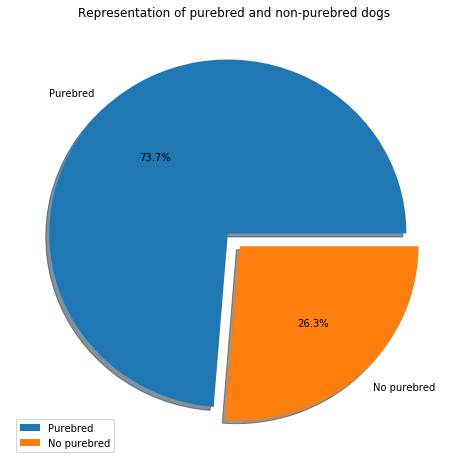

In [152]:
%matplotlib inline
alt_datas_cleaned.value_counts().plot(autopct='%1.1f%%', shadow=True, explode=[0.05, 0.05],use_index = False, kind='pie', figsize=(8, 8),legend = True, title = "Representation of purebred and non-purebred dogs", label = "");

In [ ]:
# Let's visualize the mean of likes per dogs stage

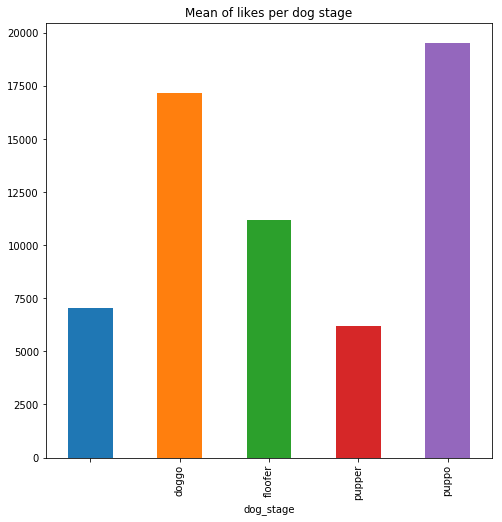

In [168]:
datas_cleaned.groupby('dog_stage')['likes_count'].mean().plot(kind = 'bar', figsize = (8,8), title = "Mean of likes per dog stage");